In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

%matplotlib inline

# **Business Understanding**
Because I am a football fan and also love Soccer Video Game, I am interested in exploring the latest FIFA 19 dataset. Thus, I will provide insights into the following questions:

Question 1: Which top 10 Nations have the greatest number of Players in the FIFA 19 dataset?

Question 2: What are the age distribution of the FIFA 19 Players?

Question 3: Which top 10 clubs have the highest total player market value and the highest average player wage?

Question 4: Choose the best squad

Question 5: Correlate between Age, Overall, Potential, Position, Club, Nationality, Special and Value,Wage

Understanding these questions may provide some advice to the Football Club Manager or real Professional football.

# Data Understanding
For this project, I will use FIFA 19 Complete Player Dataset from kaggle - **data.csv** which contains all the information of the Players.

Below steps are taken to dig and understand the data.

In [2]:
# reading in the dataset
data = pd.read_csv('./data.csv')
data.shape

(18207, 89)

In [4]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

# **Data Preparation**
During this step, I will:
*  Drop some columns containing URL and ID column (not needed)
* Check columns for missing values
* Convert string values into numbers for columns Wage and Value
* One-Hot Encode the Categorical Variableslike Club, Nationality and Preferred Positions

In [3]:
# Dropping unused columns
data.drop(['ID', 'Photo', 'Flag', 'Club Logo'], axis=1, inplace = True)
data.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [9]:
# checking for missing values in columns
columns_with_missing_values = set(data.columns[data.isnull().mean() > 0])
print(columns_with_missing_values)

{'Position', 'Finishing', 'RDM', 'Dribbling', 'RM', 'LongPassing', 'RB', 'Reactions', 'Stamina', 'GKReflexes', 'StandingTackle', 'Jersey Number', 'CDM', 'FKAccuracy', 'LCM', 'Agility', 'GKDiving', 'Body Type', 'RCM', 'Penalties', 'Joined', 'SlidingTackle', 'Crossing', 'GKHandling', 'Club', 'RW', 'Aggression', 'Work Rate', 'LDM', 'LB', 'RF', 'RAM', 'LF', 'Preferred Foot', 'Volleys', 'ShotPower', 'Interceptions', 'CM', 'LWB', 'Marking', 'BallControl', 'Composure', 'International Reputation', 'Jumping', 'CF', 'Curve', 'Positioning', 'GKPositioning', 'HeadingAccuracy', 'Vision', 'RWB', 'CB', 'Real Face', 'LCB', 'SprintSpeed', 'Weight', 'RCB', 'ST', 'Height', 'Weak Foot', 'CAM', 'LW', 'GKKicking', 'Loaned From', 'LAM', 'Acceleration', 'LM', 'LS', 'Skill Moves', 'ShortPassing', 'Balance', 'Strength', 'LongShots', 'Contract Valid Until', 'Release Clause', 'RS'}


The columns with missing values are mostly ratings at all positions. These missing values make sense since a Goal Keeper may not have position rating on other positions other than GK. Only Club out of these columns is suitable in answering my questions. Nevertheless, a player with missing value in the 'Club' column may not belong to any club at the moment, which means he is still available on free transfer. Therefore, any club interested in the player may sign him with no player's market value (i.e, without paying any transfer fee)

In [4]:
# Defining functions that converts strings to number
def convert_stringtonumber(price):
    
    """
    This function converts from price values in string type to float type numbers
    
    Parameter:
    price(str): Price values in string type with M & K as abbreviation for Million and Thousands respectively
    
    Returns:
    float: A float number represents the numerical value of the input parameter price(str)
    """
    
    if price[-1] == 'K':
        return int(price[1:-1])*1000
    elif price[-1] == 'M':
        return float(price[1:-1])*1000000
    else:
        return float(price[1:])

In [5]:
# creating another columns for the engineeered columns with function converting the strings to number
data['Value_num'] = data['Value'].apply(convert_stringtonumber)
data['Wage_num'] = data['Wage'].map(lambda x: convert_stringtonumber(x))

# drop the initial value and wage columns
data.drop(['Value', 'Wage'],axis =1)
data.Wage_num.head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage_num, dtype: float64

In [7]:
# selecting columns with categorical columns
data_cat = data.select_dtypes(include = ['object'])
data_cat_col = data_cat.columns
data_cat.tail()

,Name,Nationality,Club,Value,Wage,Preferred Foot,Work Rate,Body Type,Real Face,Position,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
18202,J. Lundstram,England,Crewe Alexandra,€60K,€1K,Right,Medium/ Medium,Lean,No,CM,...,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,€143K
18203,N. Christoffersson,Sweden,Trelleborgs FF,€60K,€1K,Right,Medium/ Medium,Normal,No,ST,...,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,€113K
18204,B. Worman,England,Cambridge United,€60K,€1K,Right,Medium/ Medium,Normal,No,ST,...,30+2,30+2,30+2,34+2,33+2,28+2,28+2,28+2,33+2,€165K
18205,D. Walker-Rice,England,Tranmere Rovers,€60K,€1K,Right,Medium/ Medium,Lean,No,RW,...,32+2,32+2,32+2,36+2,35+2,31+2,31+2,31+2,35+2,€143K
18206,G. Nugent,England,Tranmere Rovers,€60K,€1K,Right,Medium/ Medium,Lean,No,CM,...,46+2,46+2,46+2,46+2,46+2,47+2,47+2,47+2,46+2,€165K


In [42]:
# Onehotencoding 3 most important Categorical variables - Club, Nationality, Position
le = LabelEncoder()

data['Club_le']               = le.fit_transform(data['Club'].astype(str))
data['Nationality_le']        = le.fit_transform(data['Nationality'].astype(str))
data['Position_le'] = le.fit_transform(data['Position'].astype(str))

In [53]:
data[['Club_le', 'Nationality_le', 'Position_le']].head()

,Club_le,Nationality_le,Position_le
0,212,6,21
1,326,123,26
2,435,20,14
3,375,139,5
4,374,13,19


# **Answering Questions Using Data Insights**

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64


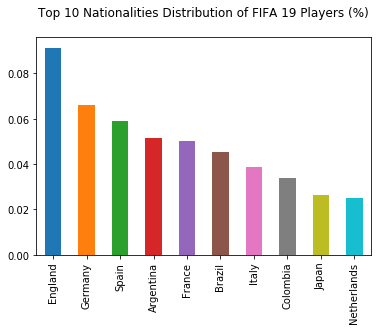

In [54]:
# Question 1: Which top 10 Nations have the greatest number of Players in the FIFA 19 dataset?
nationality_levels = data.Nationality.value_counts()
print(nationality_levels.head(10))
# visualising 
(nationality_levels[:10]/len(data)).plot.bar();
plt.title("Top 10 Nationalities Distribution of FIFA 19 Players (%)\n");

The result shows that England, Germany, Spain have most players in FIFA 19 data with France coming 5th. This is reasonable since Barclays Premier League, Bundesliga, La Liga and Ligue 1 are 4 of the 5 best  Football Leagues in Europe and in the world. This gives room for citizens of these countries to become very active in football. Furthermore, it attracts many talented players across the continents willing to become a world star. Although, Argentina and Brazil leagues are not among the top 10, they rank 4th & 6th correspondingly. This is due to their extraordinary desire for football and justifies  why they have the greatest number of gifted football players in world record history. Italy ranks as 7th since Lega Serie A is also one of the top 5 popular football league in Europe. These top 7 nations have the most famous football players in the FIFA 19 dataset.

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
Name: Age, dtype: int64


Text(0.5, 1.0, 'Age Distribution of FIFA 19 Players (%)\n')

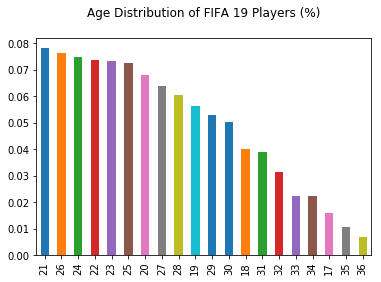

In [55]:
# Question 2: What are the age distribution of the FIFA 19 Players?
Age_level = data['Age'].value_counts()
print(Age_level.head(10))
(Age_level.head(20)/len(data)).plot('bar')
plt.title("Age Distribution of FIFA 19 Players (%)\n")

The age distribution clearly shows that most players are between 21–26 years old. This is justified as  the best  athletes are produced within this age range. Players younger than this range may not have the enough skills, experiences and chance to prove themselves on the football pitch yet. Players older than 30 may be depreciating or already retired from the football. Thus, the number of players older than 30 years is the smallest.

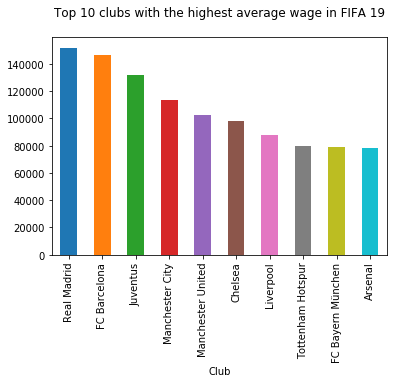

In [57]:
# Question 3: Which top 10 clubs have the highest total player market value and the highest average player wage?
data.groupby('Club').mean()['Wage_num'].sort_values(ascending = False).head(10)
data.groupby('Club').mean()['Wage_num'].sort_values(ascending = False)[:10].plot.bar()
plt.title("Top 10 clubs with the highest average wage in FIFA 19\n");

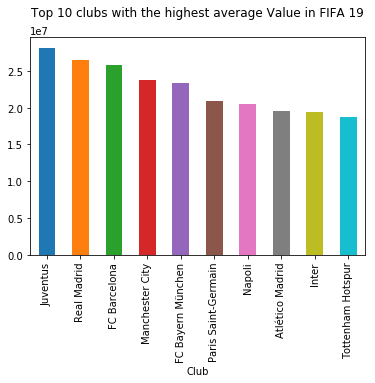

In [58]:

data.groupby('Club').mean()['Value_num'].sort_values(ascending = False)[:10].plot.bar()
plt.title("Top 10 clubs with the highest average Value in FIFA 19\n");

Real Madrid CF, FC Barcelona and Juventus have the greatest club average Value. Their players earn averagely highest compared to other players of other clubs. This high wages help to attract gifted players to the clubs.

In [59]:
# Question 4: Choose the best squad 
# The most important columns to consider in choosing the best squad are 'Name', 'Age', 'Overall', 'Potential', 'Position'
data_best_squad = data[['Name', 'Age', 'Overall', 'Potential', 'Position']]
data_best_squad.head()

,Name,Age,Overall,Potential,Position
0,L. Messi,31,94,94,RF
1,Cristiano Ronaldo,33,94,94,ST
2,Neymar Jr,26,92,93,LW
3,De Gea,27,91,93,GK
4,K. De Bruyne,27,91,92,RCM


Soccer video game Football Manager and FIFA 19 include game mode. The gamer plays the role of a football manager. He chooses his team squad by selecting the best players to win him matches. Therefore, answering this question will be useful in ensuring maximal team performance by basing squad selection on the players' Overall value.

So, the idea is to select player with the highest Overall Value for each position. Since several Positions exist, I assume that the first position is the most preferred position of that player. Then, I select the player with the highest overall value for each position. Best squad were chosen for 3 formations, namely; Formations 4–4–2, 4-1-2-3 and 3–4–1–2.

In [73]:
def best_squad(position):
    """
    This function perform selection of the player with highest Overall Value for each provided position
    
    Parameter:
    position(str): a particular position of a certain footbal formation
    
    Returns:
    Position: The position from Input Parameter
    Player:   The Best Player Name for this Position
    Overall:  The Overall Value for this Best Player
    """
    data_copy = data.copy()
    BestSquad = []
    for i in position:
        BestSquad.append([i,data_copy.loc[[data_copy[data_copy['Position'] == i]['Overall'].idxmax()]]['Name'].to_string(
            index = False), data_copy[data_copy['Position'] == i]['Overall'].max()])
        #  BestSquad.append(max overall name, max overall 
        # the player name index is used to do loc selection
        data_copy.drop(data_copy[data_copy['Position'] == i]['Overall'].idxmax(), inplace = True)

    return pd.DataFrame(np.array(BestSquad).reshape(11,3), columns = ['Position', 'Player', 'Overall']).to_string(index = False)

In [74]:
# Formation 442
squad_Formation442 = ['GK', 'LB', 'CB', 'CB', 'RB',   'LM','RM', 'CDM', 'LW', 'RW', 'CF']
print ('Best Squad of Formation 4-4-2')
print (best_squad(squad_Formation433))

Best Squad of Formation 4-4-2
Position               Player Overall
     GK               De Gea      91
     LB              Marcelo      88
     CB             D. Godín      90
     CB            S. Umtiti      87
     RB          Azpilicueta      86
     LM        P. Aubameyang      88
     RM            K. Mbappé      88
     CM               Thiago      86
     CM  S. Milinković-Savić      85
     CF         Luis Alberto      82
     CF          S. Giovinco      82


In [75]:
# Formation 4123
squad_Formation4123 = ['GK', 'LB', 'CB', 'CB', 'RB',   'LM', 'RM', 'CDM', 'LW', 'RW', 'CF']
print ('Best Squad of Formation 4-1-2-3')
print (best_squad(squad_Formation4123))

Best Squad of Formation 4-1-2-3
Position           Player Overall
     GK           De Gea      91
     LB          Marcelo      88
     CB         D. Godín      90
     CB        S. Umtiti      87
     RB      Azpilicueta      86
     LM    P. Aubameyang      88
     RM        K. Mbappé      88
    CDM  Sergio Busquets      89
     LW        Neymar Jr      92
     RW   Bernardo Silva      86
     CF     Luis Alberto      82


In [77]:
# Formation 3412
squad_Formation3412 = ['GK', 'CB', 'CB', 'CB', 'LM', 'CM', 'CM', 'RM', 'CAM', 'ST', 'ST']
print ('Best Squad of Formation 3-4-1-2')
print (best_squad(squad_Formation3412))

Best Squad of Formation 3-4-1-2
Position               Player Overall
     GK               De Gea      91
     CB             D. Godín      90
     CB            S. Umtiti      87
     CB           M. Benatia      86
     LM        P. Aubameyang      88
     CM               Thiago      86
     CM  S. Milinković-Savić      85
     RM            K. Mbappé      88
    CAM         A. Griezmann      89
     ST    Cristiano Ronaldo      94
     ST       R. Lewandowski      90


In [79]:
# Question 5: Correlate between Age, Overall, Potential, Position, Club, Nationality, Special and Value, Wage
data_correlation = data[['Name', 'Age', 'Overall', 'Potential', 'Position_le', 'Club_le', 'Nationality_le', 'Special', 'Value_num', 'Wage_num']].corr()

data_correlation

,Age,Overall,Potential,Position_le,Club_le,Nationality_le,Special,Value_num,Wage_num
Age,1.000000,0.452350,-0.253312,-0.001042,0.001995,-0.030824,0.236695,0.075022,0.141145
Overall,0.452350,1.000000,0.660939,0.063312,0.004888,-0.011851,0.606960,0.627085,0.571926
Potential,-0.253312,0.660939,1.000000,0.024432,-0.009493,0.007352,0.383727,0.576218,0.486413
Position_le,-0.001042,0.063312,0.024432,1.000000,0.003737,-0.007693,0.201667,0.047040,0.041511
Club_le,0.001995,0.004888,-0.009493,0.003737,1.000000,0.008392,0.001655,-0.001411,-0.019516
Nationality_le,-0.030824,-0.011851,0.007352,-0.007693,0.008392,1.000000,-0.005249,-0.009965,-0.020944
Special,0.236695,0.606960,0.383727,0.201667,0.001655,-0.005249,1.000000,0.377738,0.347835
Value_num,0.075022,0.627085,0.576218,0.047040,-0.001411,-0.009965,0.377738,1.000000,0.858442
Wage_num,0.141145,0.571926,0.486413,0.041511,-0.019516,-0.020944,0.347835,0.858442,1.000000


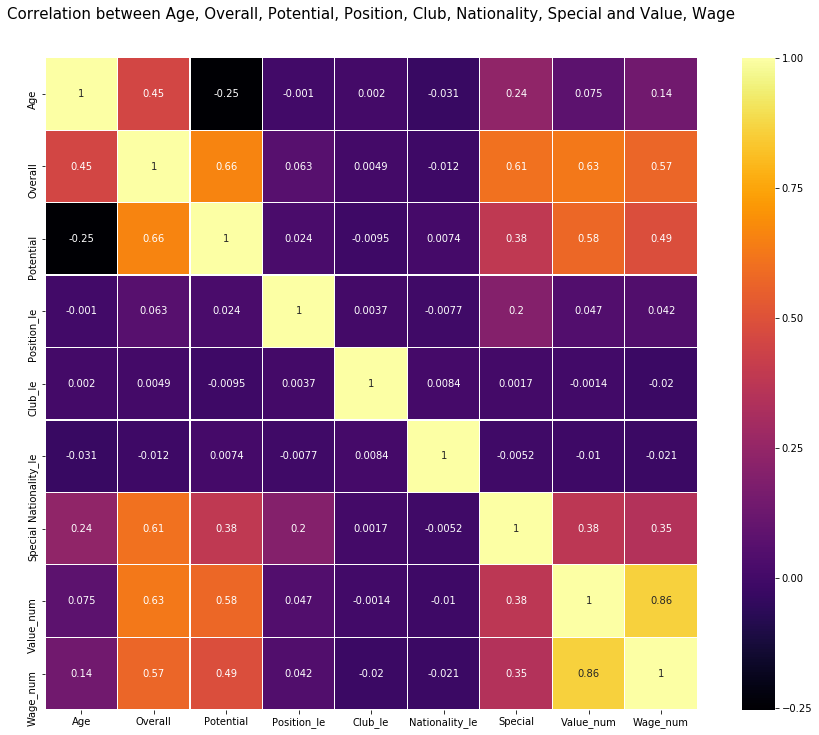

In [80]:
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Correlation between Age, Overall, Potential, Position, Club, Nationality, Special and Value, Wage', y=1.05, size=15)
sns.heatmap(data_correlation,linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

* The correlation heatmap above shows the highest positive correlation between Value and Wage of players indicating that the higher the player's Value, the greater will be his Wage. 
* This is followed by Overall and Potential. Thus, we can say that Overall & Potential are positively related to Wage & Value. * Also, Special is positively correlated to Wage & Value. 
* However, Club, Nationality and Position are not so relevant features that relate to Wage & Value. 